In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmath import nan
import plotly.express as px

In [2]:
GNI_Per_Capita = pd.read_csv('../data/GNI_Per_Capita.csv')

In [3]:
GNI_Per_Capita.head()

,Country or Area,Year(s),Value,Value Footnotes
0,Afghanistan,2012,1560,NaN
1,Afghanistan,2011,1380,NaN
2,Afghanistan,2010,1300,NaN
3,Afghanistan,2009,1220,NaN
4,Afghanistan,2008,1030,NaN


In [4]:
GNI_Per_Capita.tail(10)

,Country or Area,Year(s),Value,Value Footnotes
5205,Zambia,1989,810,NaN
5206,Zambia,1988,800,NaN
5207,Zambia,1987,720,NaN
5208,Zambia,1986,670,NaN
5209,Zambia,1985,730,NaN
5210,Zambia,1984,730,NaN
5211,Zambia,1983,750,NaN
5212,Zambia,1982,770,NaN
5213,Zambia,1981,800,NaN
5214,Zambia,1980,680,NaN


In [5]:
GNI_Per_Capita = GNI_Per_Capita.drop('Value Footnotes', axis = 1).rename(columns={"Country or Area": "Country", "Year(s)": "Year",'Value': 'GNI_Per_Capita'})

In [6]:
px.strip(GNI_Per_Capita, x = 'GNI_Per_Capita', y = 'Year', color=  'Country')

In [7]:
GNI_Per_Capita['Year'].unique()

array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980])

In [8]:
GNI_Per_Capita.dtypes

Country           object
Year               int64
GNI_Per_Capita     int64
dtype: object

In [9]:
GNI_Per_Capita['Country'].nunique()

180

In [10]:
GNI_Per_Capita['GNI_Per_Capita']= GNI_Per_Capita['GNI_Per_Capita'].astype(float)

In [11]:
GNI_Per_Capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5215 non-null   object 
 1   Year            5215 non-null   int64  
 2   GNI_Per_Capita  5215 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 122.4+ KB


In [12]:
GNI_Per_Capita_pivoted = pd.pivot_table(GNI_Per_Capita[(GNI_Per_Capita['Year']==2012) | (GNI_Per_Capita['Year']==1980)], index = ['Country'], values = 'GNI_Per_Capita',columns = ['Year'], dropna = True)

In [13]:
GNI_Per_Capita_pivoted.head()

Year,1980,2012
Country,,
Afghanistan,NaN,1560.0
Albania,NaN,9280.0
Algeria,2820.0,8360.0
Angola,NaN,5400.0
Antigua and Barbuda,3430.0,18920.0


In [14]:
GNI_Per_Capita_pivoted = GNI_Per_Capita_pivoted.dropna()

In [15]:
GNI_Per_Capita_pivoted.head()

Year,1980,2012
Country,,
Algeria,2820.0,8360.0
Antigua and Barbuda,3430.0,18920.0
Australia,9120.0,43300.0
Austria,10270.0,43390.0
Bahamas,13630.0,29020.0


In [16]:
GNI_Per_Capita_pivoted['Percent_Change']= 100*((GNI_Per_Capita_pivoted[2012]-GNI_Per_Capita_pivoted[1980])/GNI_Per_Capita_pivoted[1980])

In [17]:
GNI_Per_Capita_pivoted['Percent_Change'].sort_values(ascending=True).head()

Country
Liberia                            -13.432836
Democratic Republic of the Congo     2.631579
Madagascar                          52.459016
Côte d’Ivoire                       54.838710
Togo                                63.636364
Name: Percent_Change, dtype: float64

Liberia is the only country with a negative change. Democtatic Republic of the Congo has next smallest change, albeit a postive one.

In [18]:
GNI_Per_Capita_pivoted['Percent_Change'].sort_values(ascending=False).head()

Country
China                3516.000000
Bhutan               1622.222222
Cabo Verde           1350.000000
Republic of Korea    1223.504274
Chile                 851.339286
Name: Percent_Change, dtype: float64

China has the largest Percent change

In [19]:
GNI_Per_Capita_2012 = GNI_Per_Capita[GNI_Per_Capita['Year']==2012]

In [20]:
GNI_Per_Capita_2012.describe()

,Year,GNI_Per_Capita
count,166.0,166.000000
mean,2012.0,13273.975904
std,0.0,14249.654494
min,2012.0,390.000000
25%,2012.0,2457.500000
50%,2012.0,7995.000000
75%,2012.0,18832.500000
max,2012.0,66960.000000


<Axes: >

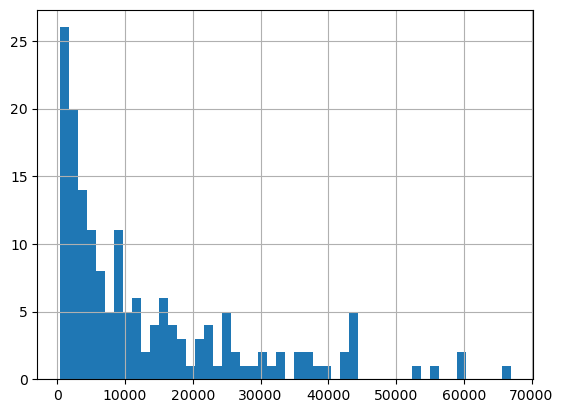

In [21]:
GNI_Per_Capita_2012['GNI_Per_Capita'].hist(bins = 50)

In [22]:
px.line(GNI_Per_Capita, x= 'Year', y = 'GNI_Per_Capita', color = 'Country')

In [23]:
GNI_Per_Capita.groupby('Country').count().sort_values('Year').head(5)

,Year,GNI_Per_Capita
Country,,
Jamaica,1,1
Qatar,5,5
Libya,8,8
Iraq,9,9
Haiti,9,9


Countries with the least representation

In [24]:
GNI_China_Liberia = GNI_Per_Capita[(GNI_Per_Capita['Country']=='China')|(GNI_Per_Capita['Country']=='Liberia')]

In [25]:
GNI_China_Liberia.head()

,Country,Year,GNI_Per_Capita
1004,China,2012,9040.0
1005,China,2011,8240.0
1006,China,2010,7470.0
1007,China,2009,6740.0
1008,China,2008,6200.0


In [26]:
GNI_China_Liberia_pivoted = pd.pivot_table(GNI_China_Liberia, index= ['Year'], values= 'GNI_Per_Capita', columns= 'Country')

<Axes: xlabel='Year'>

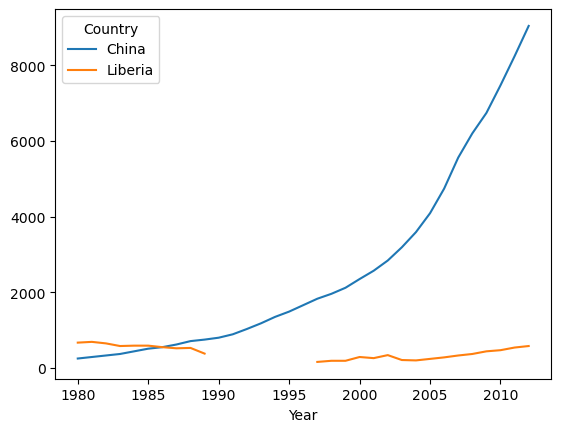

In [27]:
GNI_China_Liberia_pivoted.plot()

In [28]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [29]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1).rename(columns={"Country or Area": "Country",'Year':'Year','Value':'GDP_Per_Capita'})

In [30]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [31]:
gdp_gni = pd.merge(gdp_df, GNI_Per_Capita, on = ["Country",'Year'], how = "inner")

In [32]:
gdp_gni

,Country,Year,GDP_Per_Capita,GNI_Per_Capita
0,Afghanistan,2012,2075.491614,1560.0
1,Afghanistan,2011,1904.559926,1380.0
2,Afghanistan,2010,1957.029070,1300.0
3,Afghanistan,2009,1758.904477,1220.0
4,Afghanistan,2008,1484.114461,1030.0
...,...,...,...,...
3209,Zambia,1994,1902.392868,810.0
3210,Zambia,1993,2133.263601,890.0
3211,Zambia,1992,2045.973499,810.0
3212,Zambia,1991,2133.687490,810.0


In [33]:
gdp_gni_2012 = gdp_gni[gdp_gni['Year']==2012
                    ]

In [34]:
px.strip(gdp_gni_2012, x = 'GDP_Per_Capita', y = 'GNI_Per_Capita',color = 'Country')

In [35]:
gdp_gni_2012['GDP_Per_Capita'].corr(gdp_gni_2012['GNI_Per_Capita'])

0.9616021806615795

Positive Correlation between GDP_Per_Capita and GNI_Per_Capita

Q. Which country has the largest disparity between their GDP and GNI?

In [36]:
gdp_gni_2012['Difference'] = 2*(gdp_gni_2012['GDP_Per_Capita']-gdp_gni_2012['GNI_Per_Capita'])/(gdp_gni_2012['GDP_Per_Capita']+gdp_gni_2012['GNI_Per_Capita'])

/tmp/ipykernel_101151/1218305641.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
gdp_gni_2012.nlargest(4,'Difference')

,Country,Year,GDP_Per_Capita,GNI_Per_Capita,Difference
1328,Guyana,2012,10780.936500,3340.0,1.053887
1734,Liberia,2012,1611.345438,580.0,0.941290
1351,Haiti,2012,2973.969059,1220.0,0.836424
720,Comoros,2012,2946.054224,1210.0,0.835434


In [38]:
gdp_gni_2012.nsmallest(4,'Difference')

,Country,Year,GDP_Per_Capita,GNI_Per_Capita,Difference
2919,Timor-Leste,2012,3143.277792,6230.0,-0.658622
1631,Kiribati,2012,1976.287942,3870.0,-0.647834
253,Barbados,2012,15338.696330,25670.0,-0.503859
3168,Vanuatu,2012,3046.316662,4300.0,-0.341309


<Axes: >

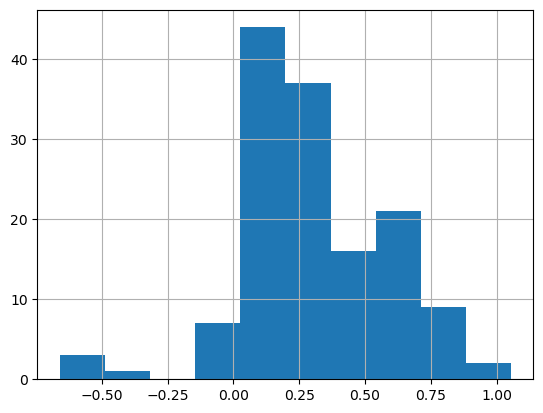

In [41]:
gdp_gni_2012['Difference'].hist()

In [39]:
gdp_gni_Guyana_Timor = gdp_gni[(gdp_gni['Country']=='Guyana') | (gdp_gni['Country']== 'Timor-Leste')]

<Axes: xlabel='GDP_Per_Capita', ylabel='GNI_Per_Capita'>

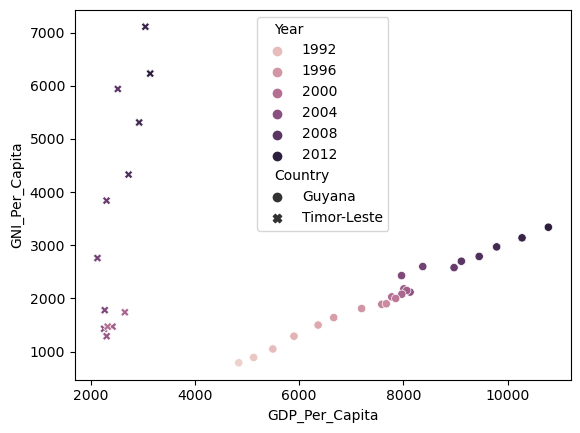

In [42]:
sns.scatterplot(gdp_gni_Guyana_Timor, x='GDP_Per_Capita', y = 'GNI_Per_Capita', hue = 'Year',  style='Country')

While the correlation is positive ( and linear), the rate at which the increase in one parameter increases another is not the same for countries

It would be interesting to see a distribution of the slopes of these lines for various countries

In [51]:
gdp_gni_pivoted = pd.pivot_table(gdp_gni, index= ['Country','Year'],values = ('GDP_Per_Capita','GNI_Per_Capita'))

In [67]:
gdp_gni_pivoted

GDP_Per_Capita  GNI_Per_Capita
Country     Year                                
Afghanistan 2002     1189.784668           700.0
            2003     1235.810063           750.0
            2004     1200.278013           750.0
            2005     1286.793659           830.0
            2006     1315.789117           880.0
...                          ...             ...
Zambia      2008     2747.438504          1240.0
            2009     2917.515557          1380.0
            2010     3125.528849          1380.0
            2011     3201.288029          1500.0
            2012     3339.269902          1590.0

[3214 rows x 2 columns]